# Tabu Search

We will be implementing our second meta-heuristic algorithm for the Travelling Salesman Problem (TSP) called Tabu Search. This algorithm is memory-based and is an iterative approach to the problem which works by removing components and marking them as Tabu as it iterates over the solution thus creating a neighbourhood which is restricted to only use non-tabu components.



Pseudocode: (Tabu Search)

Algorithm - Tabu Search
Input: TabuList Size
Output: Sbest (Shortest cycle path)


1.  TabuList = ∅
2.  while (stopCondition())
3.    candidateList ← ∅
4.    for (Scandidate ∈ Sbestneighbourhood)
5.     if (containsAnyFeatures(Scandidate, TabuList))
6.       candidateList ← Scandidate
7.     end if
8.  end while
9.  Scandidate ← LocateBestCandidate(candidateList)
10. if(Cost(Scandidate)≤ Cost(Sbest))
11.  Sbest ← Scandidate
12.  TabuList ← FeatureDifferences(Scandidate, Sbest)
13.  while(TabuList > TabuListsize)
14.    DeleteFeature(TabuList)
15.  end while
16. end if
17. Return (Sbest)

(Brownlee, 2015)


References:

http://www.cleveralgorithms.com/nature-inspired/stochastic/tabu_search.html (Accessed 26th March 2020)


Big O-Notation:






In [20]:
from random import randint, choice
from pprint import pprint
from itertools import permutations
from math import inf as oo
from math import sqrt
from time import time
import matplotlib.pyplot as plt
import copy

MAX_DISTANCE = 100

def random_symmetric_graph(n):
    ''' Symmetric adjacency matrix of size nxn '''
    dist_matrix = [[oo for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(i+1,n):
            v = randint(1,MAX_DISTANCE)
            dist_matrix[i][j] = v
            dist_matrix[j][i] = v
    return dist_matrix

def random_euclidean_graph(n):
    ''' Symmetric adjacency matrix of a Euclidean graph of size nxn '''
    dist_matrix = [[oo for _ in range(n)] for _ in range(n)]
    points = []
    for p in range(n):
        x,y = randint(0,MAX_DISTANCE), randint(0,MAX_DISTANCE)
        points.append((x,y))
    for i in range(n):
        p1 = points[i]
        for j in range(i+1,n):
            p2 = points[j]
            distance = sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
            dist_matrix[i][j] = distance
            dist_matrix[j][i] = distance
    return dist_matrix

def show(G):
    ''' Show adjacency matrix. Useful for debugging. '''
    n = len(G)
    r = "     "
    for i in range(n):
        r += f'{i:4}'
    r += '\n    -'+'-'*(4*n)+'\n'
    for i in range(n):
        r += f'{i:2} | '
        for j in range(n):
            r += f'{G[i][j]:4}'
        r += '\n'
    r = r.replace('inf', '  ∞')
    print(r)

def cost(G, cycle):
    ''' Calculate the cost of the given cycle '''
    c = 0
    n = len(G)
    for i in range(n):
        a = cycle[i]
        b = cycle[(i+1)%n]
        c += G[a][b]
    return c

In [28]:
G = random_symmetric_graph(12)

In [30]:
show(G)

        0   1   2   3   4   5   6   7   8   9  10  11
    -------------------------------------------------
 0 |    ∞  77   9  69  27  94  94  87   5  24  77  95
 1 |   77   ∞  64  32  70  48  17  80   8   9  16  25
 2 |    9  64   ∞   4  52  26  75  96  80  77  36  30
 3 |   69  32   4   ∞   2  73  48  54  33  28  96  65
 4 |   27  70  52   2   ∞  19  54  63  42  32  36  28
 5 |   94  48  26  73  19   ∞  53  88 100  89  95  10
 6 |   94  17  75  48  54  53   ∞  38  13  47  76  58
 7 |   87  80  96  54  63  88  38   ∞  29  91   7  16
 8 |    5   8  80  33  42 100  13  29   ∞  49   7  28
 9 |   24   9  77  28  32  89  47  91  49   ∞  50  72
10 |   77  16  36  96  36  95  76   7   7  50   ∞  33
11 |   95  25  30  65  28  10  58  16  28  72  33   ∞



# Tabu Search

In [31]:
def distance (P1, P2):
    return math.sqrt((P1.x - P2.x)**2 + (P1.y - P2.y)**2)

def neighbours(points):
    neighbour_list = {}
    
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            if i not in neighbour_list:
                neighbour_list[i] = {}
                neighbours_list[i][j]= distance(points[i], points[j])
            else:
                neighbour_list[i][j] = distance(points[i], points[j])
            
            if j not in neighbour_list:
                neighbour_list[j] = {}
                neighbour_list[j][i] = distance(points[j], points[i])
            else:
                neighbour_list[j][i] = distance(points[j], points[i])

    return neighbour_list
                
    
def solution_one(nodes, neighbour_list):
    startnode = nodes[0]
    endnode = startnode
    
    solution = []
    dist = 0 #or could be neighbours
    visiting = startnode
    node = None
    
    while visiting not in solution_one:
        temp = copy.deepcopy(neighbour_list[visiting])
        temp.pop(node, None)
        nodenext = min(temp.items(), key=lambda x: x[1])[0]
        dist += neighbour_list[visiting][nodenext]
        solution.append(visiting)
        node = visiting
        visiting = nodenext
        
        solution.append(nodes[0])
        distance += neighbour_list[node][endnode]
        
        return solution, dist
    
def neighborhood(solution, neighbour_list, t_opt=1):
    neighbourhoodsolution = []
    for n in solution[1:-t_opt]:
        id1 = []
        n_index = solution.index(n)
        for i in range(t_opt):
            id1.append(n_index+i)

        for nn in solution[1:-t_opt]:
            id2 = []
            nn_index = solution.index(nn)
            for i in range(t_opt):
                id2.append(nn_index+i)
            if bool(
                set(solution[id1[0]:(id1[-1]+1)]) &
                set(solution[id2[0]:(id2[-1]+1)])):
                
                continue
                
            temp = copy.deepcopy(solution)
            for i in range(t_opt):
                temp[id1[i]] = solution[id2[i]]
                temp[id2[i]] = solution[id1[i]]

            distance = 0
            for k in temp[:-1]:
                nodenext = temp[temp.index(k) + 1]
                distance = distance + neighbour_list[k][nodenext]
                
            temp.append(distance)
            if temp not in neighbourhoodsolution:
                neighborhoodsolution.append(temp)

    lastitemlist = len(neighborhoodsolution[0]) - 1

    neighborhoodsolution.sort(key=lambda x: x[lastitemlist])
    return neighborhoodsolution
    


    
    
def tabu_search(T):
    Y = copy.deepcopy(T)
    

My code

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [49]:
# Constant definition
MIN_VAL = [-5.0, -5.0]            # The minmum limit of variable
MAX_VAL = [5.0, 5.0]              # The maxxmum limit of variable

In [55]:

# Class definition
class TS():
    """
        TS class
    """
 
    def __init__(self,vcount=2,ccount=50,tabuL=25,iters=200,tabu_objs=10):
        """
            Initiate the parameters of TS
            -----------------------------
            Parameter:
                vcount    : The number of variables
                ccount    : The number of candidate solutions
                tabuL     : Tabu length(tenure)
                iters     : Number of iterations
                tabu_objs : Number of tabu objects
        """
 
        self.vcount = vcount                                    # The number of variables.
        self.ccount = ccount                                    # The number of candidate solutions.
        self.iters = iters                                      # Number of iterations, as the end rule.
        self.tabu_objs = tabu_objs 
        self.tabu_list = [None]*self.tabu_objs                  # Tabu list, used to store the tabu object.
        self.tabu_len = tabuL                                   # Tabu length.
        self.tabu_len_list = np.array([0]*self.tabu_objs)       # Tabu length list, Corresponds to the Tabu list.
        self.cur_solu = np.array([0.0]*self.vcount)             # The current solution.
        self.best_solu = np.array([0.0]*self.vcount)            # The best solution.
        self.trace = []                                         # Record the route of best solution.
        
    def valuate(self, x):
        """
            valuation function
            ------------------
            The valuation function as the rule of contempt is usually the objective function.
            ------------------
            Parameter:
                x : The solution of the valuation function.
        """
 
        # Objective function
        value = 5*np.cos(x[0]*x[1])+x[0]*x[1]+x[1]**3
        # Return value
        return value
 
    def update_Tabu(self, mode, index=None, solu=None):
        """
            upadte_Tabu function
            --------------------
            This function is used to update the tabu list and the tenure of tabu object.
            --------------------
            Parameter:
                mode  :
                index :
                solu  :
        """
        
        indices = []                               # Store the index the value, which is equal to zero.
        # Update the tenure of tabu object.
        for i in range(len(self.tabu_len_list)):   
            if self.tabu_len_list[i] != 0:
                self.tabu_len_list[i] -= 1         
        # The ralease mode
        if mode == 'release':
            self.sequence_Tabu(index)                 
        # The add mode
        elif mode == 'add':
            tabuObj = self.valuate(solu) 
            if self.tabu_list[0] == None:
                self.sequence_Tabu(0)
            self.tabu_list[len(self.tabu_list)-1] = tabuObj
            self.tabu_len_list[len(self.tabu_list)-1] = self.tabu_len
        # Update the tabu list depending on the content of the tabu_list_list.
        for i in range(len(self.tabu_len_list)):
            if self.tabu_len_list[i] == 0:
                indices.append(i)
        if len(indices) == 1:
            self.sequence_Tabu(indices[0])
        elif len(indices) > 1:
            # Part 1
            maxindex = max(indices)                # Maximum index
            self.sequence_Tabu(maxindex)
            # Part 2
            for i in indices:
                if i != max(indices):
                    self.tabu_list[i] = None       # Set the tabu object as None.
                    self.tabu_len_list[i] = 0      # Set the tenure of tabu object as zero.
            objs = []
            objs1 = []
            for obj in self.tabu_list[:maxindex]:
                if obj != None:
                    objs.append(obj)
            for obj in self.tabu_len_list[:maxindex]:
                if obj != 0:
                    objs1.append(obj)
            if objs != []:
                for i in range(len(objs)):
                    self.tabu_list[maxindex-i-1] = objs[i]
                    self.tabu_len_list[maxindex-i-1] = objs1[i]
                for i in range(maxindex-len(objs)):
                    self.tabu_list[i] = None
                    self.tabu_len_list[i] = 0
            else:
                for i in range(maxindex):
                    self.tabu_list[i] = None
                    self.tabu_len_list[i] = 0
            
    def sequence_Tabu(self, index):
        """
            sequence_Tabu function
            ----------------------
            Parameter:
                index : The index of the tabu object to be deleted.
        """
        
        if index != len(self.tabu_list)-1:
            for i in range(len(self.tabu_list)-1-index):
                self.tabu_list[index+i] =  self.tabu_list[index+i+1]
                self.tabu_len_list[index+i] = self.tabu_len_list[index+i+1]
            self.tabu_list[len(self.tabu_list)-1] = None
            self.tabu_len_list[len(self.tabu_list)-1] = 0
 
    def run(self):
        """
            run function
            ------------
            Execute the TS algorithm.
        """
 
        # Produce the initial solution and set the best soluiton.
        for i in range(self.vcount):
            self.cur_solu[i] = rd.uniform(-2,2)
            self.best_solu[i] = self.cur_solu[i]
        # Update the tabu list and the tenure of tabu object.
        self.update_Tabu('add', solu=self.cur_solu)
        # Iteration
        counter = 0                                             # The counter of iteration      
        while counter < self.iters:
            counter += 1                                        # The counter add 1 when finishs a loop.
            candi_solu = np.zeros((self.ccount, self.vcount))   # Store the candidate solutions.
            # Select some candidate solutions from the near area of the current solution.
            for i in range(self.ccount):
                for j in range(self.vcount):
                    candi_solu[i,j] = self.cur_solu[j] + rd.uniform(-1, 1)
            # Identify whether the candidate solutions are kept in the limited area.
            for i in range(self.vcount):
                for j in range(self.ccount):
                    if candi_solu[j,i] > MAX_VAL[i]:
                        candi_solu[j,i] = MAX_VAL[i]
                    elif candi_solu[j,i] < MIN_VAL[i]:
                        candi_solu[j,i] = MIN_VAL[i]
            isAll = False                                       # A sign of all solutions kept in tabu list.
            isPart = False                                      # A sign of a part of solutions kept in tabu list.
            count = [0]*self.ccount
            for i in range(self.ccount):
                for k in range(len(self.tabu_list)):
                    if self.valuate(candi_solu[i]) == self.tabu_list[k]:
                        count[i] = 1
            temp = 0
            for i in count:
                if i == 1:
                    temp += 1
            if temp == self.ccount:
                isAll = True
            elif temp < self.ccount and temp > 0:
                isPart = True
                
            if isAll == True:
                ############################################
                #    Part1 : All solutions in Tabu list.   #
                ############################################
                temp_tabu_list = []
                for tabuObj in self.tabu_list:
                    if tabuObj != None:
                        temp_tabu_list.append(tabuObj)
                index = np.argmin(np.array(temp_tabu_list))         # Obtain the index of minimum value from the tabu list
                temp_solu = np.array([0.0]*self.vcount)
                for solu in candi_solu:
                    if self.valuate(solu) == self.tabu_list[index]:
                        temp_solu = solu
                # Update the current solution.
                self.cur_solu = temp_solu
                # Update the best solution according to the valuate function and requirements.
                if self.valuate(self.cur_solu) < self.valuate(self.best_solu):
                    self.best_solu = self.cur_solu           
                # Update the tabu list and the tenure of tabu object.
                self.update_Tabu('release',index=index)
                
            elif isPart == True:
                ##################################################
                #    Part2 : A part of solutions in Tabu list.   #
                ##################################################
                isExistbest = False
                temp_bsolu = []
                bsolu = np.array([0.0]*self.vcount)
                for solu in candi_solu:
                    if self.valuate(solu) < self.valuate(self.best_solu):
                        isExistbest = True
                        temp_bsolu.append(solu)
                if isExistbest == True:
                    ###################################################################
                    #    Part2.1 : Exist the best solution in  candidate solutions.   #
                    #              Some of these exist in tabu list.                  #
                    ###################################################################
                    isInTabu = False
                    index = 0
                    #
                    if len(temp_bsolu) == 1:
                        bsolu = temp_bsolu[0]
                    elif len(temp_bsolu) != 1 and len(temp_bsolu) != 0:
                        bsolu = temp_bsolu[0]
                        for solu in temp_bsolu[1:]:
                            if self.valuate(solu) < self.valuate(bsolu):
                                bsolu = solu
                    #
                    for i in range(len(self.tabu_list)):
                        if self.valuate(bsolu) == self.tabu_list[i]:
                            isInTabu = True
                            index = i
                    # Update the current solution.
                    self.cur_solu = bsolu
                    # Update the best solution.
                    if self.valuate(bsolu) < self.valuate(self.best_solu):
                        self.best_solu = bsolu
                    # 
                    if isInTabu == True:
                        # Update the tabu list and the tenure of tabu object.
                        self.update_Tabu('release', index=index)
                    else:
                        index = len(self.tabu_list)-1
                        # Update the tabu list and the tenure of tabu object.
                        self.update_Tabu(index, 'add', solu=self.cur_solu)
                else:
                    #################################################################
                    #    Part2.2 : None the best solution in candidate solutions.   #
                    #              None solutions exist in tabu list.               #
                    #################################################################
                    notInTabu = []
                    for solu in candi_solu:
                        count = 0
                        for i in range(len(self.tabu_list)):
                            if self.valuate(solu) != self.tabu_list[i]:
                                count += 1
                        if count == len(self.tabu_list):
                            notInTabu.append(solu)
                    temp_solu = notInTabu[0]
                    if len(notInTabu) != 1:
                        for solu in notInTabu[1:]:
                            if self.valuate(solu) < self.valuate(temp_solu):
                                temp_solu = solu
                    # Update the current solution according to the valuate function and requirements.
                    if self.valuate(temp_solu) < self.valuate(self.cur_solu):
                        self.cur_solu = temp_solu
                        # Update the tabu list and the tenure of tabu object.
                        self.update_Tabu('add', index=len(self.tabu_list)-1, solu=self.cur_solu) 
                        # Update the best solution according to the valuate function and requirements.
                        if self.valuate(self.cur_solu) < self.valuate(self.best_solu):
                            self.best_solu = self.cur_solu
                
            else:
                #############################################
                #    Part3 : None solutions in tabu list.   #
                #############################################
                bcandi_solu = candi_solu[0]
                for solu in candi_solu[1:]:
                    if self.valuate(solu) < self.valuate(bcandi_solu):
                        bcandi_solu = solu
                # Update the current solution according to the valuate function and requirements.
                if self.valuate(bcandi_solu) < self.valuate(self.cur_solu):                    
                    self.cur_solu = bcandi_solu                    
                    # Update the tabu list and the tenure of tabu object.
                    self.update_Tabu('add', index=len(self.tabu_list)-1, solu=self.cur_solu)
                    # Update the best solution according to the valuate function and requirements.
                    if self.valuate(self.cur_solu) < self.valuate(self.best_solu):
                        self.best_solu = self.cur_solu                                                
                
            # Add the best solution to the trace list
            self.trace.append(self.valuate(self.best_solu))

Optimal solution: [-5.          0.65813578]
minimum -7.95014826188


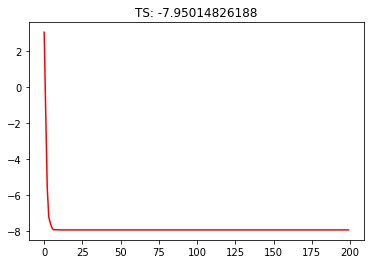

In [56]:
def main():
    """
        main function
    """
 
    ts = TS(iters=200)
    ts.run()
    print('Optimal solution:', ts.best_solu)
    print('minimum', ts.valuate(ts.best_solu))
 
    plt.plot(ts.trace, 'r')
    title = 'TS: ' + str(ts.valuate(ts.best_solu))
    plt.title(title)
    plt.show()
 
if __name__ == "__main__":
 
    main()


References
http://www.programmersought.com/article/6631362509/